First, create the sequences: <br>
1 - 10,000 <br>
1 - 20,000 <br>
1 - 100,000 <br>
Side note: I wonder why Benford didn't count the frequencies of 1 and 9 as a first digit in more than 3 points between 1 and 100,000...was it because they didn't have programs to do that quickly in 1938, and so he manually did counted them? If that's the case, *improvement idea*: come back and compute the frequency of first digits in the natural numbers for many more points between 1 and 100,000.

In [15]:
nn_1_10000 = list(range(1,10001))
nn_1_20000 = list(range(1,20001))
nn_1_100000 = list(range(1,100000))

Now count the number of 1's as a first digit in one_ten and calculate the relative frequency of it.
First, I need to extract the first digits from one_ten.

In [16]:
def first_digit(num):
    return int(str(num)[0])

In [17]:
# Create a function that takes in a list of first digits, and spits out the relative frequencies of 1 through 9
def calc_rel_freq(first_dig_list):
    relfreq = []
    for i in range(1,10):
        perc = first_dig_list.count(i)/len(first_dig_list)
        relfreq.append(perc)
    return relfreq

In [18]:
def geometric_basis(nn_range):
    # extract the first digits
    # Improvement idea: change input to allow a list of lists, then iterate through each list to extract the first digits and calculate the frequencies
    nn_range_firstdigs = [first_digit(n) for n in nn_range]
    relfreq = calc_rel_freq(nn_range_firstdigs)
    return relfreq

In [19]:
# def iter_thru_ranges() part of my improvement idea, go here for more reference:
# https://www.geeksforgeeks.org/args-kwargs-python/#:~:text=The%20special%20syntax%20*args%20in,used%20with%20the%20word%20args.

In [20]:
relfreq_1_10000 = geometric_basis(nn_1_10000)
relfreq_1_20000 = geometric_basis(nn_1_20000)
relfreq_1_100000 = geometric_basis(nn_1_100000)
print(relfreq_1_10000)
print(relfreq_1_20000)
print(relfreq_1_100000)

[0.1112, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111]
[0.55555, 0.0556, 0.05555, 0.05555, 0.05555, 0.05555, 0.05555, 0.05555, 0.05555]
[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]


Okay so this is very interesting... my results in the cell above match Benford's claim for the linear frequencies of 1 as a first digit in natural number ranges, but I'm also calculating this for the rest of the digits 2-9... it's odd that it doesn't really seem to match what Benford had. I know that for first 9s he calculated 1 to 10,000 then 1 to 89,999 and then 1 to 99,999 but still, separating the ranges out shouldn't change the points you get ... should it? Let me try creating new ranges, then seeing what the results are. <br>

In [21]:
nn_1_10000 = list(range(1,10001))
nn_1_89999 = list(range(1,90000))
nn_1_99999 = list(range(1,100000))
relfreq_1_10000 = geometric_basis(nn_1_10000)
relfreq_1_89999 = geometric_basis(nn_1_89999)
relfreq_1_99999 = geometric_basis(nn_1_99999)
print(relfreq_1_10000)
print(relfreq_1_89999)
print(relfreq_1_99999)

[0.1112, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111, 0.1111]
[0.1234569272991922, 0.1234569272991922, 0.1234569272991922, 0.1234569272991922, 0.1234569272991922, 0.1234569272991922, 0.1234569272991922, 0.1234569272991922, 0.012344581606462294]
[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]


Huh okay, so the relative frequency for first 9s is 0.1111 at natural number 10,000 <br>
0.0123 at natural number 90,000 <br>
and 0.1111 at natural number 100,000 <br>
which lines up perfectly with Fig. 2 from page 559 of *The Law of Anomalous Numbers*.

In [22]:
relfreq_first1s = [relfreq_1_10000[0], relfreq_1_20000[0], relfreq_1_89999[0], relfreq_1_99999[0]]
relfreq_first4s = [relfreq_1_10000[3], relfreq_1_20000[3], relfreq_1_89999[3], relfreq_1_99999[3]]
relfreq_first5s = [relfreq_1_10000[4], relfreq_1_20000[4], relfreq_1_89999[4], relfreq_1_99999[4]]
relfreq_first9s = [relfreq_1_10000[8], relfreq_1_20000[8], relfreq_1_89999[8], relfreq_1_99999[8]]

In [23]:
from matplotlib import pyplot as plt
nn = [10000, 20000, 90000, 100000]

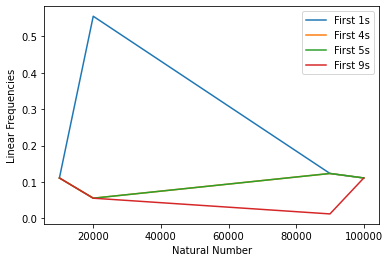

In [28]:
plt.plot(nn,relfreq_first1s, label='First 1s')
plt.plot(nn, relfreq_first4s, label = 'First 4s')
plt.plot(nn, relfreq_first5s, label = 'First 5s')
plt.plot(nn,relfreq_first9s, label='First 9s')
plt.xlabel('Natural Number')
plt.ylabel('Linear Frequencies')
plt.legend()
plt.show()

It's very interesting, it appears that the First 4s and First 5s. Both follow a distribution more similar to First 9s than First 1s, although they don't follow the same exact pattern. The First 4s and First 5s still start out at 0.1111, then decrease to the same point as the first 9s at Natural Number 20,000, then increase at the same rate to 0.1234 at 90,000, which overlaps with the First 1s. <br>
Considering that 8120/8137= 99.79% of the 2003-2004 committee-to-committee in-kind contributions are in the range of \\$1 to \\$10,000, the frequency of first 4s and first 5s should be around 0.1111 for each. In the actual committee-to-committe in-kind transactions data, the relative frequency of first 4s is 0.1198 and for first 5s is 0.0973. So the first 4s is very similar to the relative frequency found in the natural numbers 1 to 10,000, and the first 5s is off by 0.1111-0.0973=0.0138, but the Benford's distribution Cho and Gaines used had the relative frequency of first 5s being 0.095, which is very close to 0.0973. <br>
In conclusion, I believe that to begin with, there is not that much of a deviation at the first 4s and first 5s in the 2003-2004 committee-to-committee in-kind contributions to begin with, even if graphically it may appear so. If we used the Benford's distribution Dr. Cho and Dr. Gaines used, there's even less of a reason to believe they are heuristically a noteworthy deviation. <br> <br>
Work Cited: <br>
Benford, F. (1938), “The Law of Anomalous Numbers,” Proceedings of the American Philosophical Society, 78, 551–572.